In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from typing import Optional
from recommenders.implicit_models import EventRecommender

ModuleNotFoundError: No module named 'recommenders'

In [72]:
def split_df_into_diapasons(df: pd.DataFrame) -> pd.DataFrame:
    activity = df.groupby('user_id')['clicks_count'].count().sort_values(ascending=False).reset_index()
    activity['freq'] = df.groupby('user_id')['user_id'].transform('count')
    activity['diapason'] = pd.cut(activity['clicks_count'], bins=np.linspace(0, 70, 15))
    return activity


In [73]:
def validate(
        user_id: str,
        user_event_df: pd.DataFrame,
        min_size_of_clicked: int = 5,
        number_of_recommended=10
) -> float:
    clicked_by_user = user_event_df.loc[user_event_df.user_id == user_id]

    if clicked_by_user.shape[0] > min_size_of_clicked:
        clicked_by_user = clicked_by_user.sample(n=min_size_of_clicked)

    count = 0
    for _, clicked_event in clicked_by_user.iterrows():
        example = user_event_df[(user_event_df.user_id == clicked_event.user_id) &
                                (user_event_df.event_id == clicked_event.event_id)]
        us_ev = user_event_df.drop(example.index)
        recommender = EventRecommender(us_ev, 'als')
        recommended_to_user = recommender.get_quick_user_recommendation(user_id, number_of_recommended)

        if example.iloc[0].event_id in list(recommended_to_user.event_id.values):
            count += 1

    return round(count / len(clicked_by_user), 2)

In [94]:
def get_probability_distribution(
        user_activity_df: pd.DataFrame,
        user_event_df: pd.DataFrame,
        num_of_recommended: int = 10
) -> dict:
    histogram = dict()

    for i in reversed(list(user_activity_df['diapason'].unique())):
        users_in_interval = user_activity_df.loc[
            (user_activity_df.diapason == i) &
            (user_activity_df.freq > 1) &
            (user_activity_df.clicks_count > 1)]
        if users_in_interval.shape[0] != 0:
            user_from_interval = users_in_interval.sample().iloc[0]
            print('#' * 30)
            print(f'{i}: PROCESSING')
            if prob := validate(
                    user_id=user_from_interval.user_id,
                    user_event_df=user_event_df,
                    number_of_recommended=num_of_recommended):
                if prob > 0:
                    histogram[i] = prob
                    print(f'For {i} probability is: {prob}')
                elif prob == 0:
                    print(f'For {i} probability is zero.')
        else:
            print(f'{i} IS EMPTY')
    return histogram

In [75]:
def draw_histogram(activity_df: pd.DataFrame, histogram: dict, region_name: str, color: str):
    keys = [str(i) for i in histogram.keys()]
    values = list(histogram.values())

    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
    fig.suptitle(f'Результат тестирования для региона: {region_name}')
    ax1.set_xlabel('Число кликов по интервалам')
    ax1.set_ylabel('Вероятность')
    ax1.bar(keys, values, color=color)
    ax1.grid(True)

    activity = activity_df.groupby('diapason').count().reset_index()
    activity['percent'] = (activity['user_id'] / activity['user_id'].sum())
    ax2 = activity.plot.barh(x='diapason', y='percent', ax=ax2, color=color)
    ax2.set_title('Распределение кликов по интервалам')

## Пермский край

In [76]:
perm_user_event = pd.read_csv('perm_user_event_df.csv')
perm_user_event.drop(columns='Unnamed: 0', inplace=True)
perm_activity = split_df_into_diapasons(df=perm_user_event)

In [77]:
perm_hist = get_probability_distribution(
    perm_activity,
    perm_user_event)


##########
(0.0, 5.0]: PROCESSING


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

For (0.0, 5.0] probability is: 1.0
##########
(5.0, 10.0]: PROCESSING


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

For (5.0, 10.0] probability is: 0.2
##########
(10.0, 15.0]: PROCESSING


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

For (10.0, 15.0] probability is: 0.8
##########
(15.0, 20.0]: PROCESSING


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

For (15.0, 20.0] probability is: 1.0
##########
(20.0, 25.0]: PROCESSING


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

For (20.0, 25.0] probability is: 0.4
##########
(25.0, 30.0]: PROCESSING


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

(30.0, 35.0] IS EMPTY
(35.0, 40.0] IS EMPTY


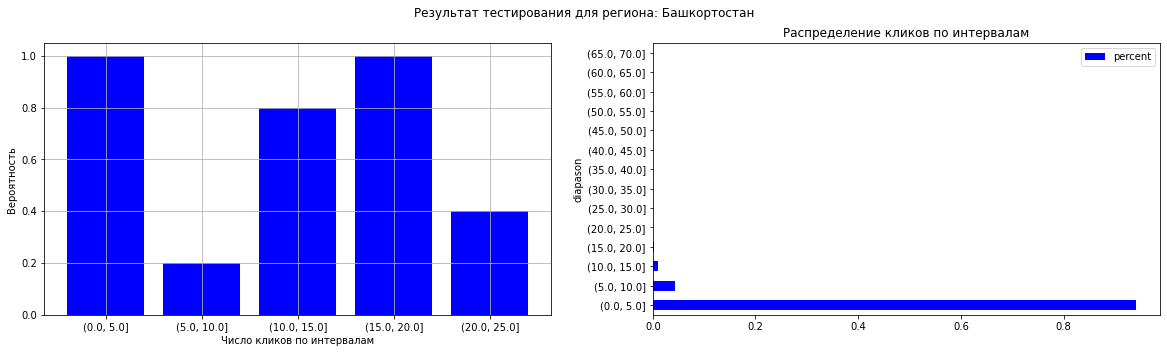

In [78]:
draw_histogram(
    activity_df=bashkortostan_activity,
    histogram=bashkortostan_hist,
    region_name='Башкортостан',
    color='blue'
)

## Республика Татарстан

In [79]:
tatarstan_user_event = pd.read_csv('tatarstan_user_event_df.csv')
tatarstan_user_event.drop(columns='Unnamed: 0', inplace=True)
tatarstan_activity = split_df_into_diapasons(df=tatarstan_user_event)

In [80]:
tatarstan_histogram = get_probability_distribution(
    tatarstan_activity,
    tatarstan_user_event)

##########
(0.0, 5.0]: PROCESSING


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

For (0.0, 5.0] probability is: 0.33
##########
(5.0, 10.0]: PROCESSING


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

For (5.0, 10.0] probability is: 0.2
##########
(10.0, 15.0]: PROCESSING


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

For (10.0, 15.0] probability is: 0.2
##########
(15.0, 20.0]: PROCESSING


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

##########
(20.0, 25.0]: PROCESSING


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

For (20.0, 25.0] probability is: 0.6
##########
(25.0, 30.0]: PROCESSING


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

For (25.0, 30.0] probability is: 0.6
##########
(30.0, 35.0]: PROCESSING


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

For (30.0, 35.0] probability is: 0.2
##########
(35.0, 40.0]: PROCESSING


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

(40.0, 45.0] IS EMPTY
(45.0, 50.0] IS EMPTY


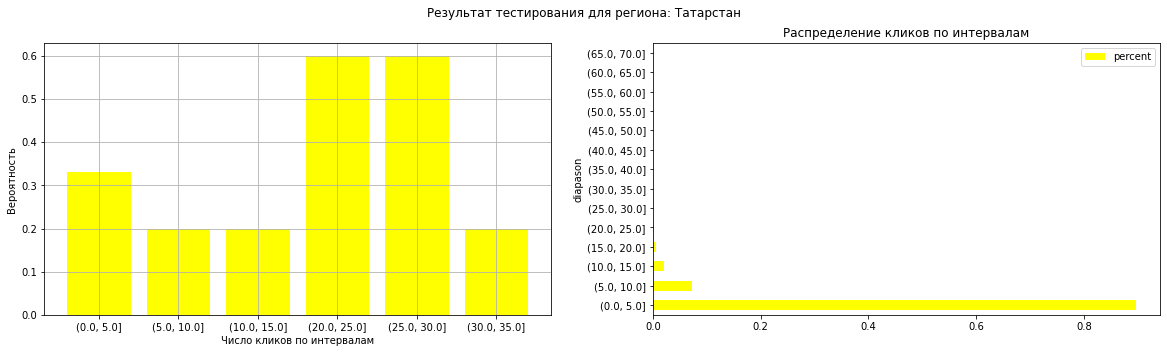

In [81]:
draw_histogram(
    activity_df=tatarstan_activity,
    histogram=tatarstan_histogram,
    region_name='Татарстан',
    color='yellow'
)

## Кемеровская область

In [82]:
kemerov_user_event = pd.read_csv('kemerov_user_event_df.csv')
kemerov_user_event.drop(columns='Unnamed: 0', inplace=True)
kemerov_activity = split_df_into_diapasons(df=kemerov_user_event)

In [83]:
kemerov_hist = get_probability_distribution(
    kemerov_activity,
    kemerov_user_event)

##########
(0.0, 5.0]: PROCESSING


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

For (0.0, 5.0] probability is: 1.0
##########
(5.0, 10.0]: PROCESSING


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

For (5.0, 10.0] probability is: 0.4
##########
(10.0, 15.0]: PROCESSING


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

For (10.0, 15.0] probability is: 0.8
##########
(15.0, 20.0]: PROCESSING


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

For (15.0, 20.0] probability is: 0.6
##########
(20.0, 25.0]: PROCESSING


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

##########
(25.0, 30.0]: PROCESSING


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

For (25.0, 30.0] probability is: 0.6
##########
(30.0, 35.0]: PROCESSING


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

##########
(40.0, 45.0]: PROCESSING


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

For (40.0, 45.0] probability is: 0.4
(45.0, 50.0] IS EMPTY
(55.0, 60.0] IS EMPTY


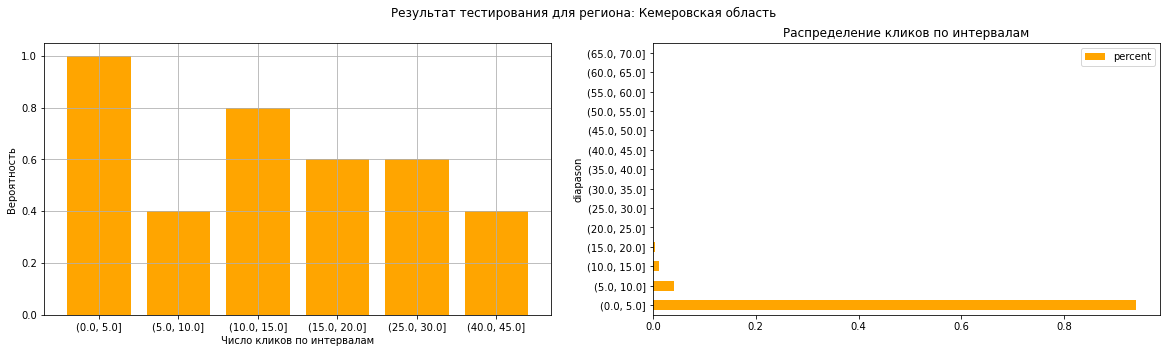

In [84]:
draw_histogram(
    activity_df=kemerov_activity,
    histogram=kemerov_hist,
    region_name='Кемеровская область',
    color='orange'
)

## Новосибирская область

In [85]:
novosib_user_event = pd.read_csv('novosib_user_event_df.csv')
novosib_user_event.drop(columns='Unnamed: 0', inplace=True)
novosib_activity = split_df_into_diapasons(df=novosib_user_event)

In [86]:
novosib_hist = get_probability_distribution(
    novosib_activity,
    novosib_user_event)

##########
(0.0, 5.0]: PROCESSING


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

For (0.0, 5.0] probability is: 0.6
##########
(5.0, 10.0]: PROCESSING


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

For (5.0, 10.0] probability is: 1.0
##########
(10.0, 15.0]: PROCESSING


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

For (10.0, 15.0] probability is: 0.4
##########
(15.0, 20.0]: PROCESSING


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

For (15.0, 20.0] probability is: 0.8
##########
(20.0, 25.0]: PROCESSING


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

For (20.0, 25.0] probability is: 0.4
##########
(25.0, 30.0]: PROCESSING


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

For (25.0, 30.0] probability is: 0.4
##########
(30.0, 35.0]: PROCESSING


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

(50.0, 55.0] IS EMPTY
(65.0, 70.0] IS EMPTY


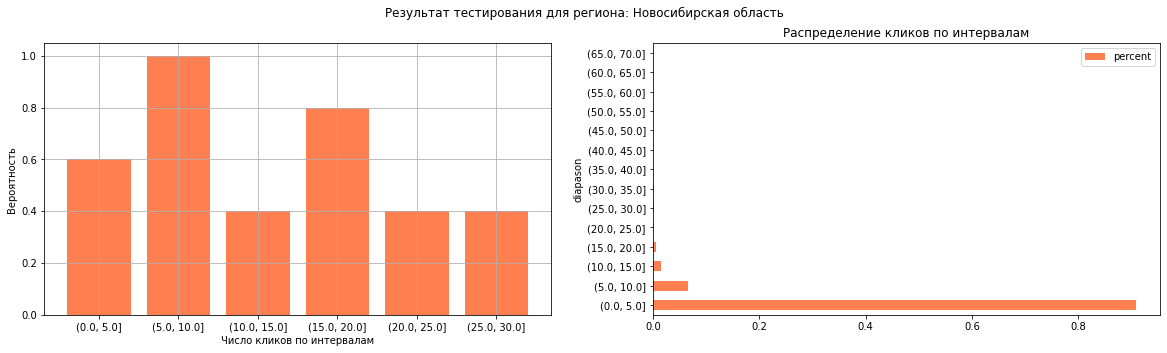

In [87]:
draw_histogram(
    activity_df=novosib_activity,
    histogram=novosib_hist,
    region_name='Новосибирская область',
    color='coral'
)

## Волгоградская область

In [88]:
volgograd_user_event = pd.read_csv('volgograd_user_event_df.csv')
volgograd_user_event.drop(columns='Unnamed: 0', inplace=True)
volgograd_activity = split_df_into_diapasons(df=volgograd_user_event)

In [96]:
volgograd_hist = get_probability_distribution(
    volgograd_activity,
    volgograd_user_event)

##############################
(0.0, 5.0]: PROCESSING


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

For (0.0, 5.0] probability is: 1.0
##############################
(5.0, 10.0]: PROCESSING


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

For (5.0, 10.0] probability is: 0.2
##############################
(10.0, 15.0]: PROCESSING


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

For (10.0, 15.0] probability is: 0.4
##############################
(15.0, 20.0]: PROCESSING


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

For (15.0, 20.0] probability is: 0.4
##############################
(20.0, 25.0]: PROCESSING


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

For (20.0, 25.0] probability is: 0.2
(25.0, 30.0] IS EMPTY
(30.0, 35.0] IS EMPTY
(35.0, 40.0] IS EMPTY


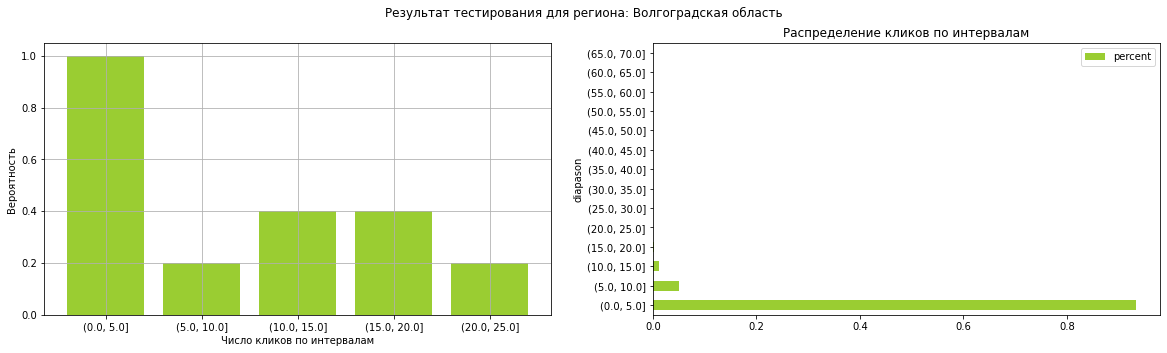

In [97]:
draw_histogram(
    activity_df=volgograd_activity,
    histogram=volgograd_hist,
    region_name='Волгоградская область',
    color='yellowgreen'
)